Proportional Controller Tuning

In [2]:
import control as ct
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import math as mt

In [3]:
mw = 20
mc = 375
kw = 100000
ks = 10000
b = 2000
# replace the *s with the expressions you have derived in Step 6
A = np.array([[0, 1, 0, 0], [(-kw-ks)/mw, -b/mw, ks/mw, b/mw], [0, 0, 0, 1], [ks/mc, b/mc, -ks/mc, -b/mc]])
B1 = np.array([[0], [0], [0], [1/mc]]) # First column of B
B2 = np.array([[0], [kw/mw], [0], [0]]) # Second column of B
C = np.array([0, 0, 1, 0])
D1 = np.array([0]) # First column of D
D2 = np.array([0]) # Second column of D
P = ct.ss(A, B1, C, D1)

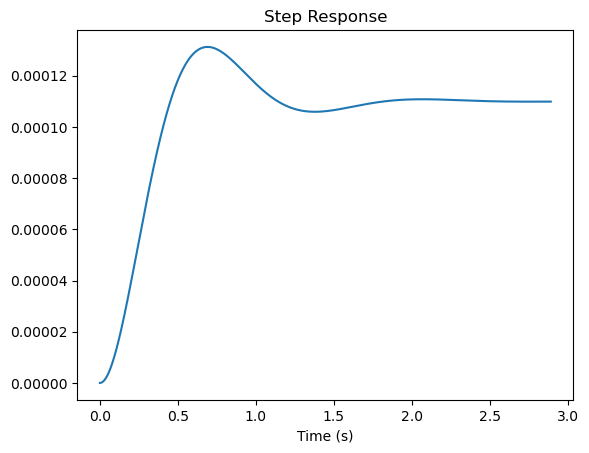

In [4]:
t, y_step = ct.step_response(P)
fig,ax = plt.subplots(1)
ax.set_title("Step Response")
ax.set_xlabel("Time (s)")
ax.plot(t,y_step)


3. Based on the root locus, for a Ts of 2s and Tp = 0.25s, we cannot design a controller. 

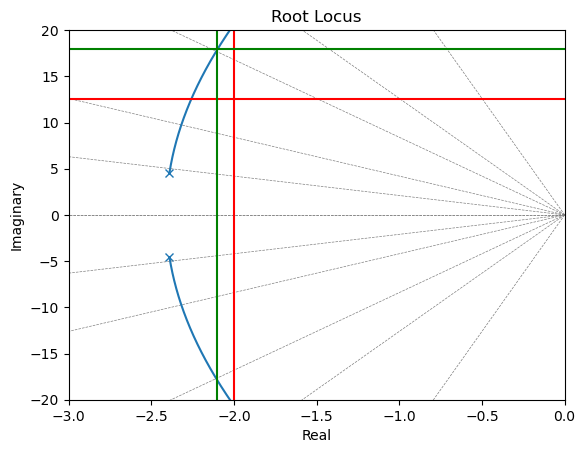

In [5]:
cl_poles, K = ct.root_locus(P)
plt.xlim([-3, 0]) 
plt.ylim([-20,20]) 
plt.axhline(y=4*3.14, color='r', linestyle='-')
plt.axvline(x=-2, color='r', linestyle='-')
plt.axvline(x=-2.1, color='g', linestyle='-') # Alpha = 2.1
plt.axhline(y=18, color='g', linestyle='-') # Beta is 18


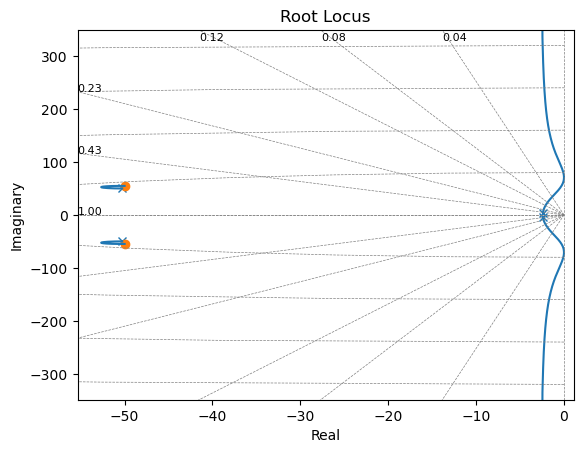

In [6]:
cl_poles, K = ct.root_locus(P)
# plt.xlim([-3, 0]) 
# plt.ylim([-20,20]) 
# plt.axhline(y=4*3.14, color='r', linestyle='-')
# plt.axvline(x=-2, color='r', linestyle='-')
# plt.axvline(x=-2.1, color='g', linestyle='-') # Alpha = 2.1
# plt.axhline(y=18, color='g', linestyle='-') # Beta is 18


4. Choose K such that the peak time is roughly 0.25 seconds and the 2%settling time is
roughly 2 seconds. Do this by increasing the value for K until you meet the design
requirement. For this system we can use surprisingly large values for K. Use the
following code snippet:

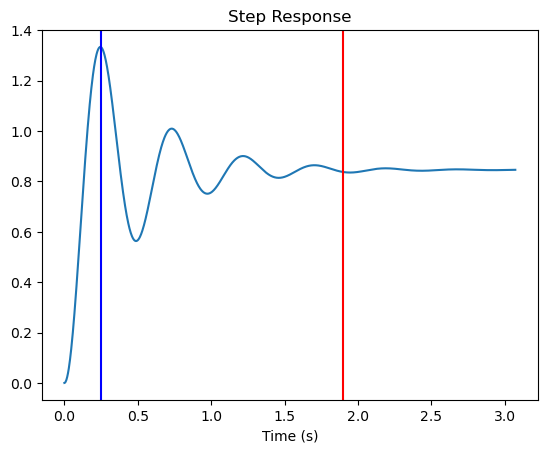

In [10]:
Kp = 50000
K = ct.tf(Kp,1)
P_tf = ct.ss2tf(P)
T = K*P_tf/(1+K*P_tf)
t, y_cl_step = ct.step_response(T)
fig,ax = plt.subplots(1)
ax.plot(t,y_cl_step)
ax.set_title("Step Response")
ax.set_xlabel("Time (s)")
plt.axvline(x=1.9, color='r', linestyle='-') ## We use an alpha of 1.75
plt.axvline(x=0.25, color='b', linestyle='-')

5. Let’s check the performance of the system we have designed! We will simulate a rough
road using low-pass filtered white noise. Our desired position is just 0 (i.e. keep the
car at the equilibrium position). Use the following code snippet for the simulation:

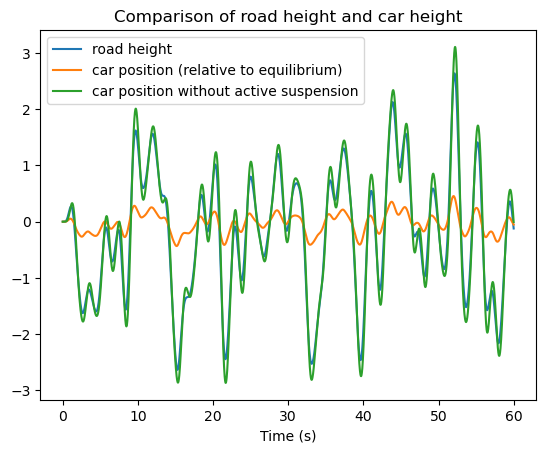

In [12]:
K = ct.tf(Kp,1)
# Now we use B2 and D2 since we are using
# x_g as the input (the road position).
P2 = ct.ss2tf(A,B2,C,D2)
S = P2/(1+P*K)
N = 5000
duration = 60
t = np.linspace(0,duration,N)
b, a = sp.signal.butter(5, 0.01, "low")
d = 10*sp.signal.lfilter(b, a, np.random.randn(N))
t,y_uc = ct.forced_response(P2,t,d)
t,y_d = ct.forced_response(S,t,d)
fig, ax = plt.subplots(1)
ax.plot(t,d, label="road height")
ax.plot(t,y_d, label="car position (relative to equilibrium)")
ax.plot(t,y_uc, label="car position without active suspension")
ax.set_title("Comparison of road height and car height")
ax.set_xlabel("Time (s)")
ax.legend()

The car position is more or less stable at 0. There is some residual noise. 

6. Change the value of K. Can you achieve a better performance of the active suspension
in terms of dampening the vibrations of the road?


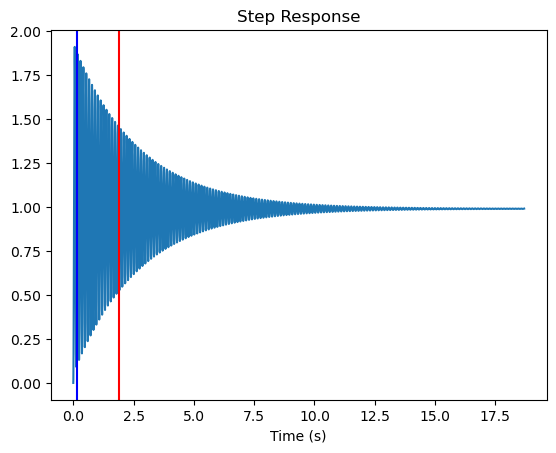

In [13]:
Kp = 1000000
K = ct.tf(Kp,1)
P_tf = ct.ss2tf(P)
T = K*P_tf/(1+K*P_tf)
t, y_cl_step = ct.step_response(T)
fig,ax = plt.subplots(1)
ax.plot(t,y_cl_step)
ax.set_title("Step Response")
ax.set_xlabel("Time (s)")
plt.axvline(x=1.9, color='r', linestyle='-') ## We use an alpha of 1.75
plt.axvline(x=0.174, color='b', linestyle='-')

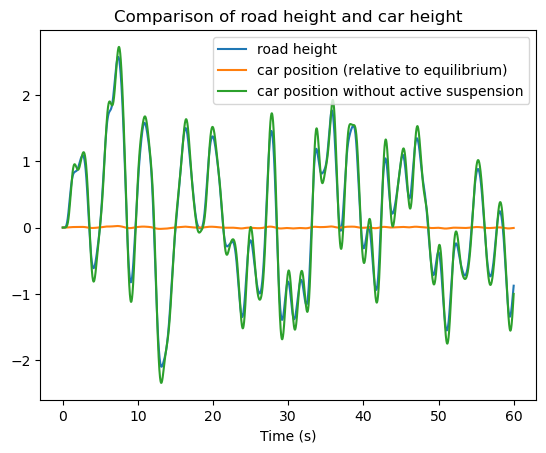

In [14]:
K = ct.tf(Kp,1)
# Now we use B2 and D2 since we are using
# x_g as the input (the road position).
P2 = ct.ss2tf(A,B2,C,D2)
S = P2/(1+P*K)
N = 5000
duration = 60
t = np.linspace(0,duration,N)
b, a = sp.signal.butter(5, 0.01, "low")
d = 10*sp.signal.lfilter(b, a, np.random.randn(N))
t,y_uc = ct.forced_response(P2,t,d)
t,y_d = ct.forced_response(S,t,d)
fig, ax = plt.subplots(1)
ax.plot(t,d, label="road height")
ax.plot(t,y_d, label="car position (relative to equilibrium)")
ax.plot(t,y_uc, label="car position without active suspension")
ax.set_title("Comparison of road height and car height")
ax.set_xlabel("Time (s)")
ax.legend()

3 Loop Shaping

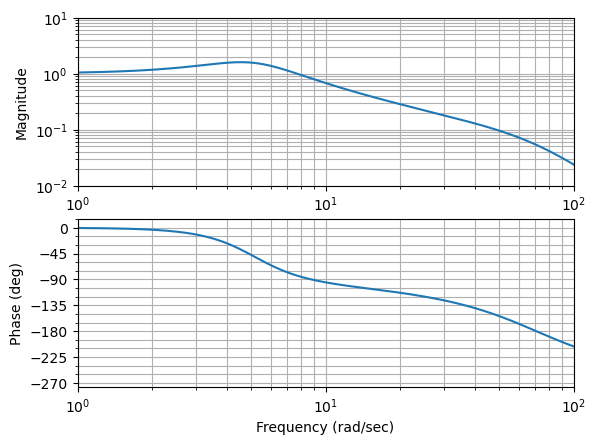

In [95]:
mag, phase, w = ct.bode_plot(P2)
fig = plt.gcf()
fig.axes[0].set_xlim(1,100)
fig.axes[0].set_ylim(0.01,10)
plt.show()

3. The expected bandwidth of the disturbance is from 1 rad/sec to 50 rad/sec

4. kL would be 50 rad/s.

In [131]:
from control import tf
Gc1 = tf([1, 2.022, 1.033], [1, 2.013, 1.013])
Gc1


TransferFunction(array([1.   , 2.022, 1.033]), array([1.   , 2.013, 1.013]))

In [132]:
from control import minreal
Gc1m = minreal(Gc1)

0 states have been removed from the model


In [133]:
from control import tfdata

[n, d] = tfdata(Gc1m)
kd  = n[0][0][0]
kp  = n[0][0][1]
ki  = n[0][0][2]
print(kd)
print(kp)
print(ki)


1.0
2.022
1.033


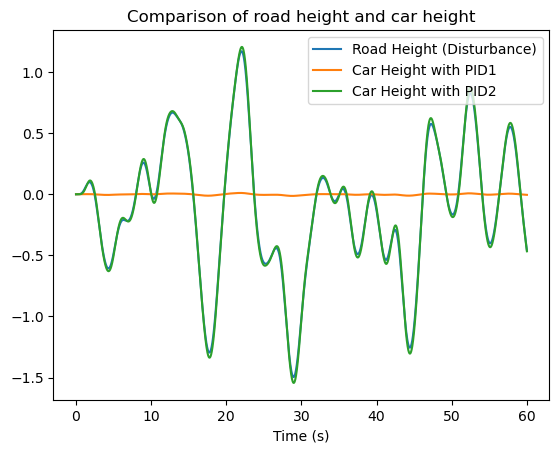

In [135]:
#9
Kp2 = kp
Ki2 = ki
Kd2 = kd
K2 = ct.tf(Kp2,1) + ct.tf([Kd2, 0], [0.001, 1]) + ct.tf([Ki2], [1, 0])
P2 = ct.ss2tf(A,B2,C,D2)
S2 = P2/(1+P*K2)
N = 5000
duration = 60
t = np.linspace(0,duration,N)
b, a = sp.signal.butter(5, 0.005, "low")
d = 10*sp.signal.lfilter(b, a, np.random.randn(N))
t,y_d = ct.forced_response(S,t,d)
t,y2_d = ct.forced_response(S2,t,d)
fig, ax = plt.subplots(1)
ax.plot(t,d, label="Road Height (Disturbance)")
ax.plot(t,y_d, label="Car Height with PID1")
ax.plot(t,y2_d, label="Car Height with PID2")
ax.set_title("Comparison of road height and car height")
ax.set_xlabel("Time (s)")
ax.legend()